## Workflow

This is my first independent machine learning project. I'll try to stay away from tutorials or solutions and compare mine with others later.
My general workflow after loading the data will be:
1. **Describing the data**: Perform exploratory analysis, find patterns.
    * Summary Statistics
    * Scale of Columns
    * Outliers and Leverage
    * Covariance and Important Features
    * Distribution of Columns
2. **Cleaning the Data**: Find problem areas, and correct, impute, or remove. Look for the following:
    * Missing Data (Columns with Nan or Null values)
    * Duplicate Data (Columns with small amounts of unique values)
    * Inconsistent/Inappropriate Values (Values in columns do not follow the same format, Negative when all values should be positive, Typos, Trailing Spaces, etc.)
    * Inconsistent Data Types (Mix of float and object)
3. **Transform Data**: Correct, Scale features, Standardize/Normalize, Featurize Text, Convert Categorial variables to Numerical
4. **Feature Selection and Creation**: Detect and remove irrelevant features, possibly perform dimensionality reduction, and create new features from existing data
5. **Choose Model and Parameters**: Select best model given assumptions and shape of data. Use grid search to tune hyperparameters.
6. **Train Model**

## Loading and Describing the Data 

In [62]:
%matplotlib inline
sns.set_theme()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn
import numpy as np
import scipy

In [3]:
train = pd.read_csv('train.csv')

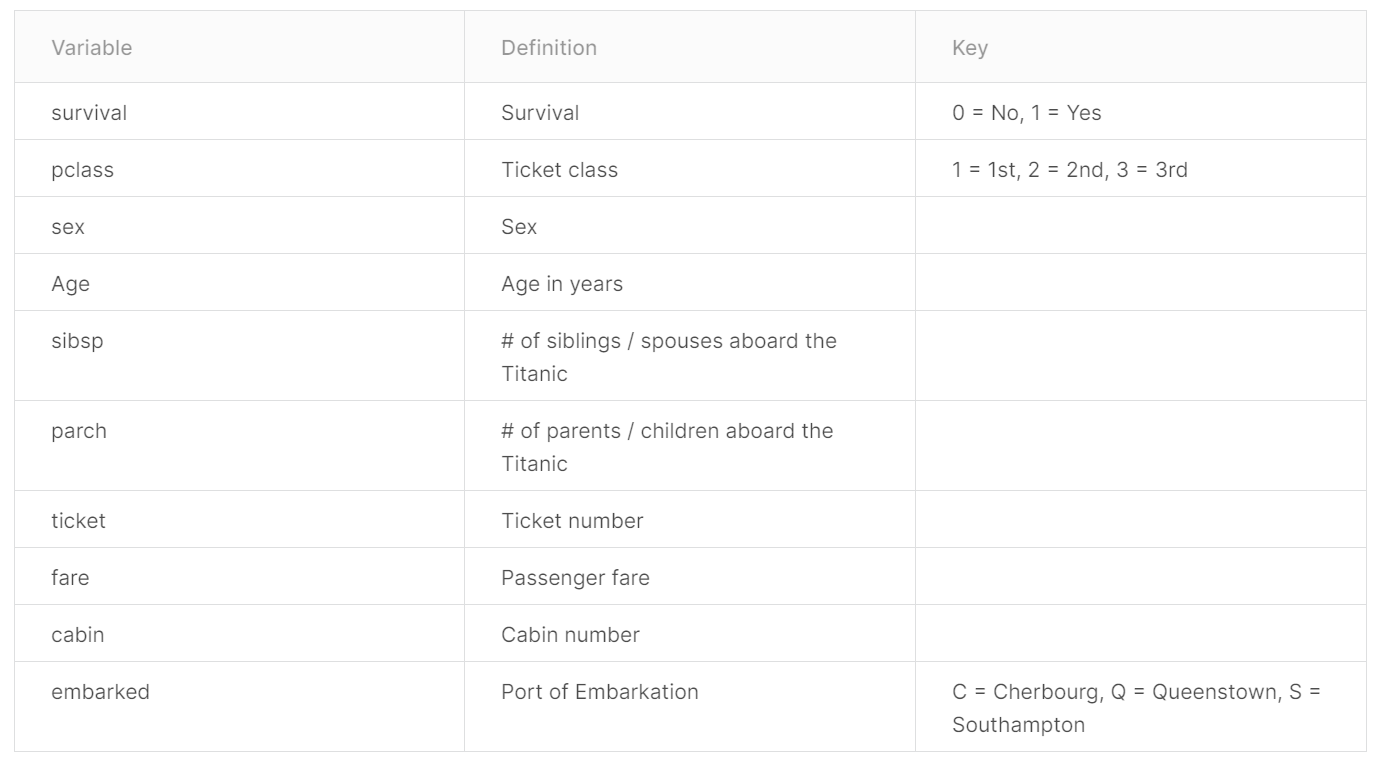

In [4]:
print(str(len(train)) + ' rows')
train.head()

891 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Numerical Features:')
print(train.select_dtypes(include=[np.number]).columns.tolist())
print('Categorical Features:')
print(train.select_dtypes(include=[np.object]).columns.tolist())

Numerical Features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
train = train.drop(['PassengerId'], axis=1)

We can drop `PassengerId` since it will definitely not have any impact on survival chance, and is just an identifier.

In [7]:
print(train.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
train.describe(include=[np.object])

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,G6,S
freq,577,7,4,644


In [12]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


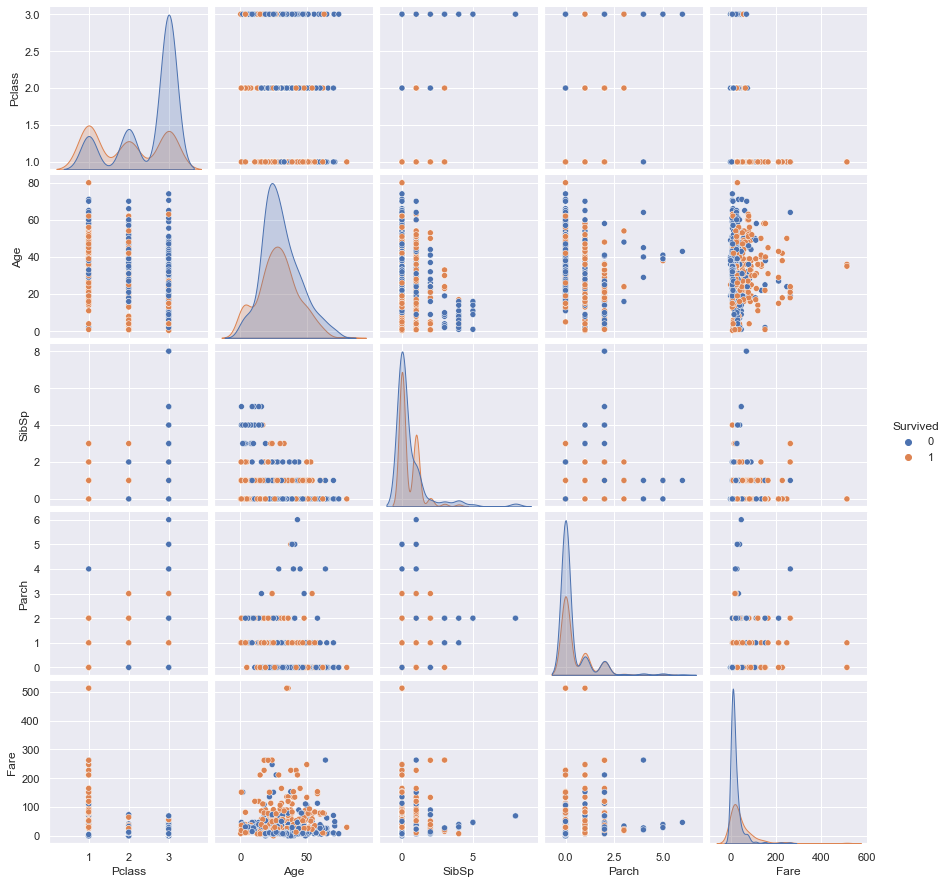

In [75]:
sns.pairplot(train, hue='Survived')
plt.show()

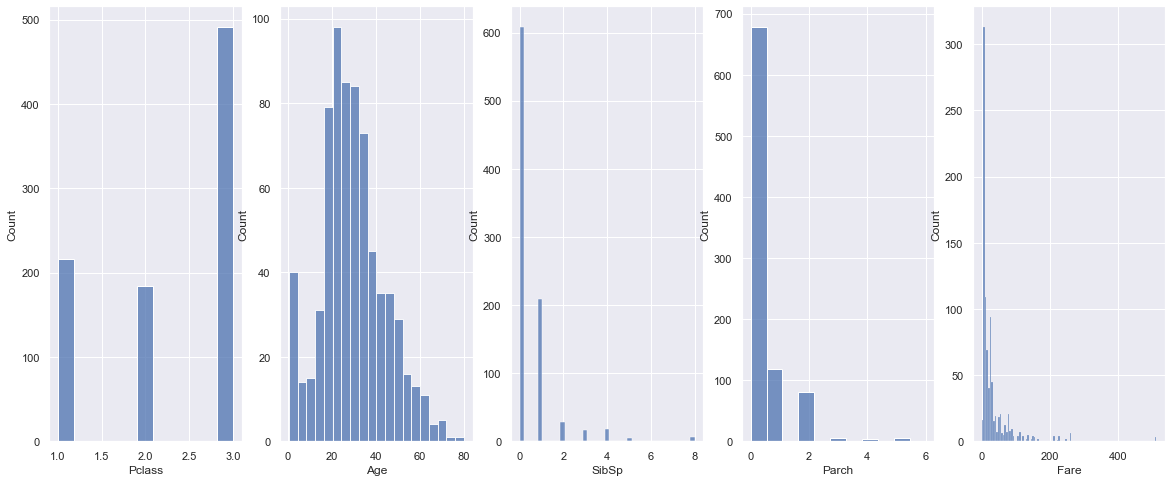

In [78]:
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
numeric_columns = train.drop('Survived', axis=1).select_dtypes(include=[np.number]).columns
for i in range(len(numeric_columns)):
    sns.histplot(ax=axes[i], data=train, x=numeric_columns[i])

### Findings

Removed `PassengerId` and `Name` because they are irrelevant to survival

#### Statistics
* 10 predictors in this dataset: `Pclass`, `Age`, `Sex`, `Cabin`, `Ticket`, `Parch`, `Fare`, `SibSp`, `Embarked`
    * 5 Numeric: `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`
    * 5 Qualitative: `Cabin`, `Embarked`, `Sex`, `Ticket`, `Name`
* 1 response variable: `Survived`
* 38% of the sample population survived
* Little correlation between `Survived` and `Sibsp`, and `Parch`
* High correlation between `Pclass` and `Survived`
* 2 unique values for `Sex`: no need for correction
    
#### Possible Problem Areas
* Missing Values
    * `Cabin`: 687 missing
    * `Age`: 177 missing
    * `Embarked`: 2 missing
* `Name` doesn't seem to a big contributor to Survival, but can be modified for title

## Cleaning

* `Sex` should be either 'male' or 'female'
* Missing Values can be imputed or removed (column or row)